In [21]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from collections import Counter


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/lending_data.csv")
df_lending = pd.read_csv(file_path)


# Review the DataFrame
df_lending.head(5)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df_lending["loan_status"]

# Separate the X variable, the features
X = df_lending.drop(columns="loan_status")

In [4]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.9918489475856377

In [11]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[18663,   102],
       [   56,   563]], dtype=int64)

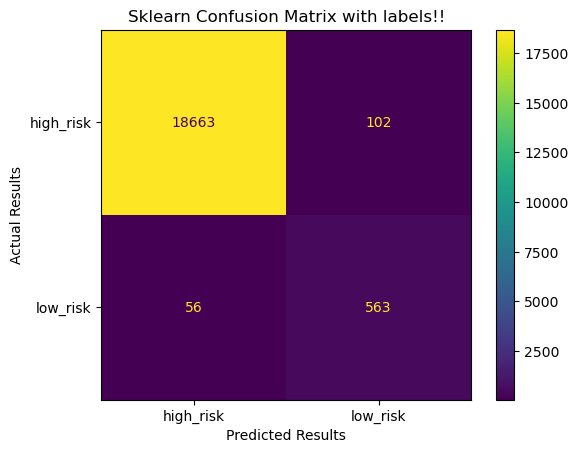

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['high_risk', 'low_risk'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Results', 
                ylabel='Actual Results')
plt.show()


In [35]:
# Print the classification report for the model
from sklearn.metrics import classification_report
target_names = "Healthy Loans", "High Risk Loans"
print(classification_report(y_test, predictions,target_names=target_names ))

                 precision    recall  f1-score   support

  Healthy Loans       1.00      0.99      1.00     18765
High Risk Loans       0.84      0.99      0.91       619

       accuracy                           0.99     19384
      macro avg       0.92      0.99      0.95     19384
   weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model using the original data does a good job of predicting the values for the 0 class (healthy loans) data. The precision for the healthy loan 1.00, meaning the model correctly made positive prediction every time. The number of times the model correctly predicted a healthy transaction(recall)-for the healthy loan is at 0.99 which is good. The logistic regression model predicted at a precision of 0.84 for the high-risk loans.

Overall, the logistic regression model generated some good numbers for the model predictions.


---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [18]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ran_sampler_model = RandomOverSampler(random_state=1)
X_resample, y_resample  = ran_sampler_model.fit_resample(X_train, y_train)

# Fit the original training data to the random_oversampler model
classifier.fit(X_resample, y_resample)

LogisticRegression(random_state=1)

In [19]:
# Count the distinct values of the resampled labels data
y_resample.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [23]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model

classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_resample, y_resample)

# Make a prediction using the testing data
predictions = classifier.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [38]:
# Print the balanced_accuracy score of the model 
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)
print(f" Accuracy Score is: {accuracy_score(y_test, predictions)}")

 Accuracy Score is: 0.9938093272802311


In [29]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
print(f"confusion matrix is: {confusion_matrix(y_test, predictions)}")


confusion matrix is: [[18649   116]
 [    4   615]]


In [31]:
# Print the classification report for the model
resample_report = classification_report(y_test, predictions)

print(resample_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The Oversampled data sligthly improves on the initial Logical Regression model. The Accuracy score increases from 0.992 to 0.994. It helps to better predict the true positives meaning that it is more effective at distinguishing high-risk loans with high recall accuraccy.